In [11]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import calendar
from matplotlib import dates
import matplotlib.ticker as ticker
import matplotlib.collections as collections


%matplotlib inline  

In [12]:
def grafico(df,curva1,curva2,curva3,semanas,cor):
      
            f, line = plt.subplots(figsize=tamanho_figura1) 
             
            df = df.fillna(0)
            
            xtick = df.index
            df['date']= pd.to_datetime(df.index) 
            df['week'] = df['date'].dt.week
            df['week'] = df['week']%2
            
            df['date'] = pd.to_numeric(df['date'])
            df['date'] = range(0,df.shape[0])
            
                      
            
            sns.set(style="ticks", color_codes=True)


                        
            df2 = df
            df2 = df2[['date','CC','LB','TC']]
            
            my_colors = ['slateblue','tomato','springgreen']
            
            df2.set_index('date').plot(kind='bar', stacked=True, ax=line,color=my_colors)
           
            
            #df.replace(0, np.nan, inplace=True)
            
            sns.lineplot(x='date',y='Programado CC', ax = line, data=df,color="blue",  dashes=[(3,10)], label='Programado CC' )
            sns.lineplot(x='date',y='Programado LB', ax = line, data=df,color="red", dashes=[(3,6)], label='Programado LB' )
            sns.lineplot(x='date',y='Programado TC', ax = line, data=df,color="lime", dashes=[(3,6)], label='Programado TC' )
            sns.lineplot(x='date',y='Programado EXP', ax = line, data=df,color="y", dashes=[(3,6)], label='Programado EXP' )
            
            line.lines[0].set_linestyle("--")
            line.lines[1].set_linestyle("--")
            line.lines[2].set_linestyle("--")
            
            handles, labels = line.get_legend_handles_labels()
 
            line.legend(handles=handles, labels=labels)

            
            plt.xticks(rotation=60, horizontalalignment='right',fontsize=10)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            line.set_title('Produção x Segmento x Programado', fontsize=12)
            line.set_xlabel('Ultimas semanas', fontsize=10)
            line.set_ylabel('Produção', fontsize=10)
                           
            
            
            collection = collections.BrokenBarHCollection.span_where(
                    df['date'],
                    ymin=0,
                    ymax=600,
                    where= df['week'] == 0,
                    facecolor='lightgreen',
                    alpha=0.3,
                    label='Semanas')
            
            line.add_collection(collection)
            
            collection = collections.BrokenBarHCollection.span_where(
                    df['date'],
                    ymin=0,
                    ymax=600,
                    where= df['week'] == 1,
                    facecolor='yellow',
                    alpha=0.2,
                    label='Semanas')
            
            line.add_collection(collection)
             
            
            
            line.set_xticklabels(df.index)  
            

            return f

In [13]:
def config_graf(ax,xticks):
    
    #Hide axis and other things
    
    rc = {
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 12,
      
      'axes.spines.left' : False,
      'axes.spines.right' : False,
      'axes.spines.bottom' : True,
      'axes.spines.top' : False,
      
      'xtick.bottom' : True,
      'xtick.labelbottom' : True,
      'ytick.labelleft' : False,
      'ytick.left' : False   
     }

    plt.rcParams.update(rc)
    
    ax.set_title('Timeline - python', fontsize=12)
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('', fontsize=10)
    
    ax.spines['bottom'].set_position(('axes', 0.5))


    
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center', fontsize = 14)
    
    ax.set(ylim=(-100,100),xticks=xticks)
    
    return ax

def add_eras(df,ax):
    collection = collections.BrokenBarHCollection.span_where(
        df['data_aux'].values,
        ymin=-100,
        ymax=100,
        where= df['Era1']==1,
        facecolor='yellow',
        alpha=0.3)
    ax.add_collection(collection)


    collection = collections.BrokenBarHCollection.span_where(
        df['data_aux'].values,
        ymin=-100,
        ymax=100,
        where= df['Era2']==1,
        facecolor='lightgreen',
        alpha=0.3)
    ax.add_collection(collection)
  

    collection = collections.BrokenBarHCollection.span_where(
        df['data_aux'].values,
        ymin=-100,
        ymax=100,
        where= df['Era3']==1,
        facecolor='lightblue',
        alpha=0.3)
    ax.add_collection(collection)
    
    return ax
    

In [14]:
dias = 88

rng = pd.date_range('1934-07-01', periods=dias, freq='Y')

df = pd.DataFrame({ 'Data':rng, 'data_aux':range(0,dias), 'Valor' : [100]*dias})

df['Exibe'] = ''
df.loc[df.index%4==0,'Exibe'] = df['Data'].dt.strftime('%Y')

df['Era1'] = 0
df['Era2'] = 0
df['Era3'] = 0

df.loc[(df['Data']>='1958-01-01')&(df['Data']<='1971-12-12'),'Era1'] = 1 
df.loc[(df['Data']>='1985-01-01')&(df['Data']<='1995-12-12'),'Era2'] = 1 
df.loc[(df['Data']>='1994-01-01')&(df['Data']<='2007-12-12'),'Era3'] = 1 

<ipython-input-13-d8069d27cffa>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center', fontsize = 14)


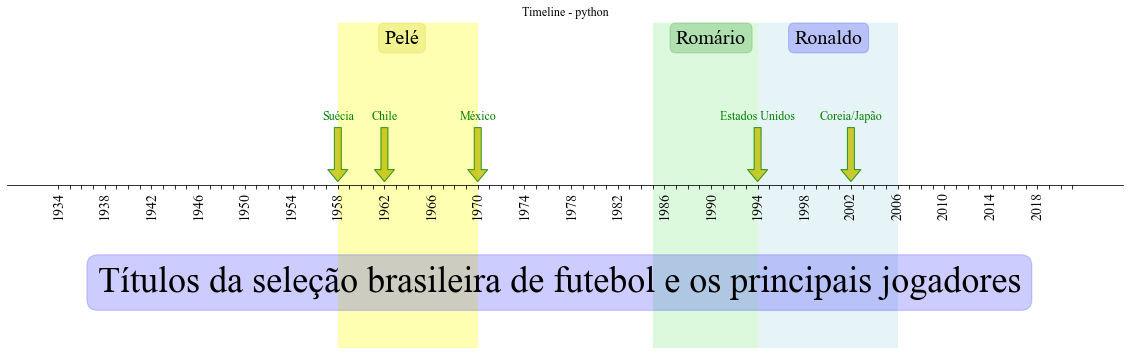

In [15]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(x='data_aux', y='Valor', ax = ax, data=df,color="white" )

ax = config_graf(ax,df['data_aux'])
ax = add_eras(df,ax)


ax.set_xticklabels(df['Exibe'])
 


ax.annotate('Pelé',
            xy=(31, 90),
            xycoords='data',
            bbox=dict(boxstyle='round', fc='y',ec='y',alpha=0.2),   # New param
            ha='right',
            va='center',
            size = 20)

ax.annotate('Romário',
            xy=(53, 90),
            xycoords='data',
            bbox=dict(boxstyle='round', fc='g',ec='g',alpha=0.2),   # New param
            ha='left',
            va='center',
            size=20)

ax.annotate('Ronaldo',
            xy=(69, 90),
            xycoords='data',
            bbox=dict(boxstyle='round', fc='b',ec='b',alpha=0.2),   # New param
            ha='right',
            va='center',
            size = 20)


plt.annotate('Suécia', xy=(24,0), xytext=(24, 40),ha='center', color = 'g',
             arrowprops=dict(fc='y',ec = 'g',alpha=0.8, shrink=0.05, headwidth=20, width=7))

plt.annotate('Chile', xy=(28,0), xytext=(28, 40),ha='center', color = 'g',
             arrowprops=dict(fc='y',ec = 'g',alpha=0.8, shrink=0.05, headwidth=20, width=7))

plt.annotate('México', xy=(36,0), xytext=(36, 40),ha='center', color = 'g',
             arrowprops=dict(fc='y',ec = 'g',alpha=0.8, shrink=0.05, headwidth=20, width=7))

plt.annotate('Estados Unidos', xy=(60,0), xytext=(60, 40),ha='center', color = 'g',
             arrowprops=dict(fc='y',ec = 'g',alpha=0.8, shrink=0.05, headwidth=20, width=7))

plt.annotate('Coreia/Japão', xy=(68,0), xytext=(68, 40),ha='center', color = 'g',
             arrowprops=dict(fc='y',ec = 'g',alpha=0.8, shrink=0.05, headwidth=20, width=7))


ax.annotate('Títulos da seleção brasileira de futebol e os principais jogadores',
            xy=(43, -60),
            xycoords='data',
            bbox=dict(boxstyle='round', fc='b',ec='b',alpha=0.2),   # New param
            ha='center',
            va='center',
            size = 36)


None